Dataset link: https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering/data

In [ ]:
from google.colab import drive

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/OnlineRetail.csv'

Mounted at /content/drive


In [ ]:
df=pd.read_csv(file_path,encoding='unicode_escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [ ]:
df['Total Amount Spent']= df['Quantity'] * df['UnitPrice']

total_amount = df['Total Amount Spent'].groupby(df['CustomerID']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()
total_amount.head()

,CustomerID,Total Amount Spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
transactions = df['InvoiceNo'].groupby(df['CustomerID']).count()
transaction = pd.DataFrame(transactions).reset_index()
transaction = transaction.rename(columns={'InvoiceNo': 'count_transactions'})
transaction.head()

,CustomerID,count_transactions
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
final = df['InvoiceDate'].max()
df['Last_transact'] = final - df['InvoiceDate']
lt= df.groupby(df['CustomerID']).min()['Last_transact']
lt = pd.DataFrame(lt).reset_index()
lt.head()

,CustomerID,Last_transact
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
df_new = pd.merge(total_amount, transaction, how='inner', on='CustomerID')

In [ ]:
df_new = pd.merge(df_new, lt, how='inner', on='CustomerID')

In [ ]:
df_new['Last_transact'] = df_new['Last_transact'].dt.days

In [ ]:
df_new.head()

,CustomerID,Total Amount Spent,count_transactions,Last_transact
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
df_new.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
df_new.columns

Index(['Total Amount Spent', 'count_transactions', 'Last_transact'], dtype='object')

In [ ]:
features=df_new.copy()

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_features=scaler.fit_transform(features)

In [ ]:
km=KMeans(init="random",n_clusters=2, n_init=10,max_iter=10,random_state=2)

In [ ]:
km.fit(scaled_features)

KMeans(init='random', max_iter=10, n_clusters=2, n_init=10, random_state=2)

In [ ]:
print(km.inertia_)  #lowest SSE value

9484.823908173632


In [ ]:
print(km.cluster_centers_)  #cluster centroids

[[ 0.05955094  0.09580151 -0.52050226]
 [-0.17437244 -0.28051853  1.52409422]]


In [ ]:
print(km.n_iter_)

8


In [ ]:
km.labels_[50:55]

array([0, 1, 0, 0, 1], dtype=int32)

In [ ]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

In [ ]:
sse=[]
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

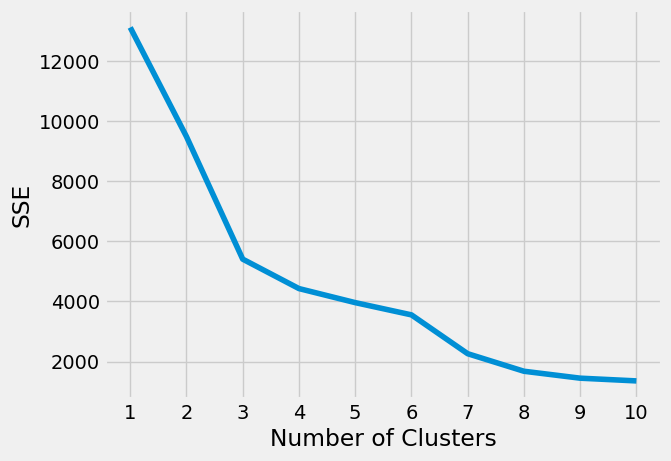

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

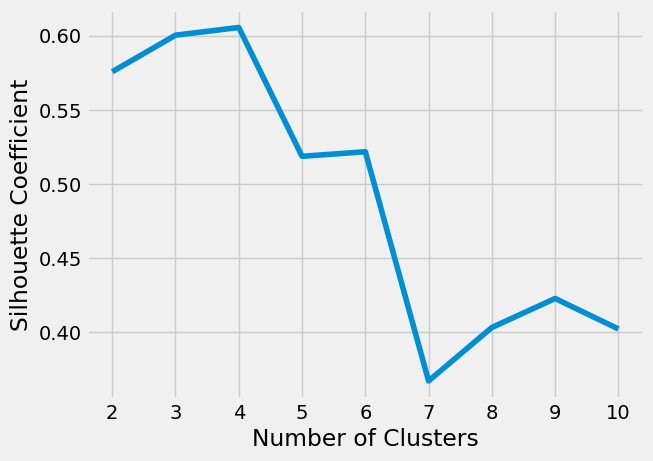

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#Since the silhouette coefficient corresponding to number of clusters=4 is the highest, the optimal number of clusters is '4'